In [1]:
!pip install --upgrade "watson-developer-cloud>=2.5.1"

Requirement already up-to-date: watson-developer-cloud>=2.5.1 in /anaconda3/lib/python3.7/site-packages (2.8.1)


In [3]:
import json
import keras
json_file = open('Team5_Microsoft.json')
json_str = json_file.read()
data = json.loads(json_str)

Using TensorFlow backend.


In [4]:
X_raw = list(data['text'].values())
y_raw = list(data['sentiment'].values())
y = keras.utils.to_categorical(y_raw, 3)

In [5]:
X = str(' '.join(X_raw))

In [6]:
print(len(X))
print(len(X_raw))

58389
178


In [7]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, SentimentOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2018-11-16',
    iam_apikey=KEY,
    url='https://gateway-wdc.watsonplatform.net/natural-language-understanding/api'
)

preds = []
count = 0
for x in X_raw:
    response = natural_language_understanding.analyze(
        text = str(x),
        features=Features(sentiment=SentimentOptions(document = True))).get_result()
    preds.append(list([count,list(response['sentiment'].values())]))
    
    count = count + 1;
    print(count)
    if count > 126:
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


WatsonApiException: Error: not enough text for language id, Code: 422 , X-dp-watson-tran-id: b9ebcc42640273774f6390797aeb3d8d , X-global-transaction-id: b9ebcc42640273774f6390797aeb3d8d

In [10]:
count = 178
reversedPreds = []
for x in reversed(X_raw):
    response = natural_language_understanding.analyze(
        text = str(x),
        features=Features(sentiment=SentimentOptions(document = True))).get_result()
    reversedPreds.append(list([count,list(response['sentiment'].values())]))
    count = count - 1;
    print(count)
    if count < 126:
        break

177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126


WatsonApiException: Error: not enough text for language id, Code: 422 , X-dp-watson-tran-id: f9255e17291974086bfda86acfda0eaa , X-global-transaction-id: f9255e17291974086bfda86acfda0eaa

In [11]:
print(X_raw[126])
print(X_raw[125])

Thanks Walter. We'll take the next question please.
Thank you.


In [12]:
response = natural_language_understanding.analyze(
    text = "Thank you. Thanks Walter. We'll take the next question please.",
    features=Features(sentiment=SentimentOptions(document = True))).get_result()
preds.append(list([125,list(response['sentiment'].values())]))

In [13]:
predictions = preds + reversedPreds[::-1]

In [14]:
predictions

[[0, [{'score': 0.877939, 'label': 'positive'}]],
 [1, [{'score': 0.828761, 'label': 'positive'}]],
 [2, [{'score': 0.675472, 'label': 'positive'}]],
 [3, [{'score': 0.761142, 'label': 'positive'}]],
 [4, [{'score': 0.366428, 'label': 'positive'}]],
 [5, [{'score': 0.543569, 'label': 'positive'}]],
 [6, [{'score': -0.516176, 'label': 'negative'}]],
 [7, [{'score': -0.490383, 'label': 'negative'}]],
 [8, [{'score': 0.971096, 'label': 'positive'}]],
 [9, [{'score': 0.972526, 'label': 'positive'}]],
 [10, [{'score': 0.493107, 'label': 'positive'}]],
 [11, [{'score': 0.863715, 'label': 'positive'}]],
 [12, [{'score': 0.775077, 'label': 'positive'}]],
 [13, [{'score': 0.769903, 'label': 'positive'}]],
 [14, [{'score': 0.69456, 'label': 'positive'}]],
 [15, [{'score': 0.896242, 'label': 'positive'}]],
 [16, [{'score': 0.939245, 'label': 'positive'}]],
 [17, [{'score': 0.792804, 'label': 'positive'}]],
 [18, [{'score': 0.832673, 'label': 'positive'}]],
 [19, [{'score': 0.703591, 'label': 'pos

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [16]:
labels = []
for x in predictions:
    labels.append(list(x[1][0].values())[1])
mapping = {'positive': 1, 'negative': 0, 'neutral':2}
label = []
for i in range(len(labels)):
    label.append(mapping.get(labels[i]))
print(label)

[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
import json
import keras
from sklearn.model_selection import train_test_split 

json_file = open('Team5_Microsoft.json')
json_str = json_file.read()
data = json.loads(json_str)

X_raw = list(data['text'].values())
y_raw = list(data['sentiment'].values())

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [19]:
print(len(y_raw))
print(len(label))

178
178


Normalized confusion matrix
[[0.2  0.8  0.  ]
 [0.03 0.95 0.02]
 [0.07 0.91 0.02]]


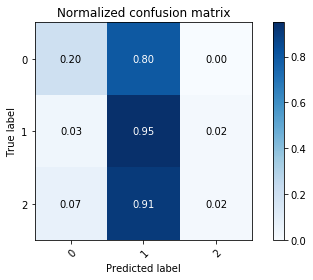

In [22]:
np.set_printoptions(precision=2)
yt = list(int(x) for x in y_raw)
# Plot normalized confusion matrix
plot_confusion_matrix(yt, label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()